In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

image = cv.imread('/home/rcardiff/ryan/ryan/PNGImages/neg_CL1.png',0)
image = image[500:1000, 0:120]

In [3]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=16, range=[0, 256]) #ravel returns flattened 1d array
ax.set_xlim(0, 256);
ax.set_ylim(0,1000);

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff371493160>)

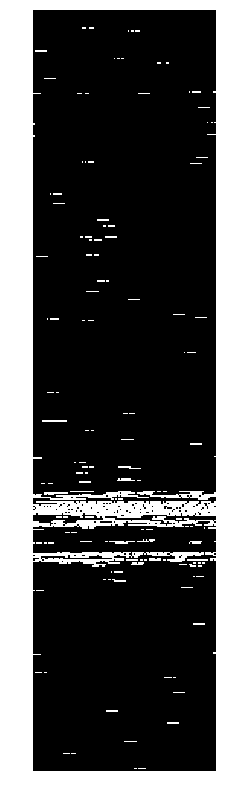

In [4]:
#basic supervised thresholding - pick a value
image_segmented = image > 32
image_show(image_segmented)

In [ ]:
#Canny ED
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/home/rcardiff/PNGImages/neg_CL1.png',0)
img = img[500:1000, 0:120]
edges = cv.Canny(img,20,200) #set thresholds

fig=plt.figure(figsize=(10, 20), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Unsupervised thresholding methods using skimage.filters

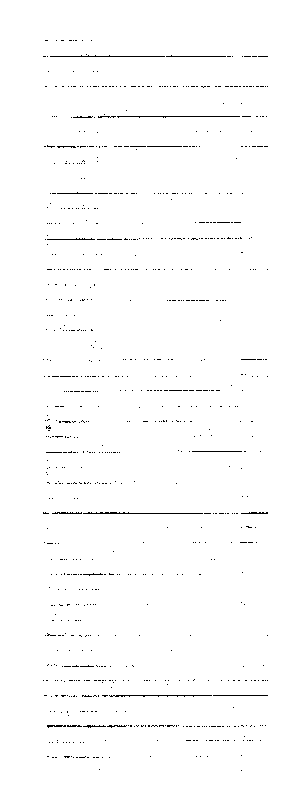

In [11]:
import skimage.filters as filters
image_threshold = filters.threshold_local(image,block_size=11,offset = 10) 
#block size = pixel neighborhood size (must be odd)
#offset = Constant subtracted from weighted mean of neighborhood to calculate the local threshold value.
image_show(image > image_threshold);

In [ ]:
image_threshold = filters.threshold_li(image) 
image_show(image > image_threshold);


In [ ]:
image_threshold = filters.threshold_mean(image) 
image_show(image > image_threshold);

#Unsupervised methods

-SLIC simple linear iterative clustering? k means --> (low resolution, slow)
-active contour?
-morphological snakes: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_morphsnakes.html#sphx-glr-auto-examples-segmentation-plot-morphsnakes-py
    -morphGAC is better for images w/ visible contours, even w/ noise but requires highlighting of contours thru pre-processing
    -morphACWE pixel values on inside and outside of regions have different avgs -does not require well defined contours, no pre-processing, easier to use and tune


In [ ]:
image_slic = seg.slic(image,n_segments=12000)
image_show(color.label2rgb(image_slic, image, kind='avg'));


8787


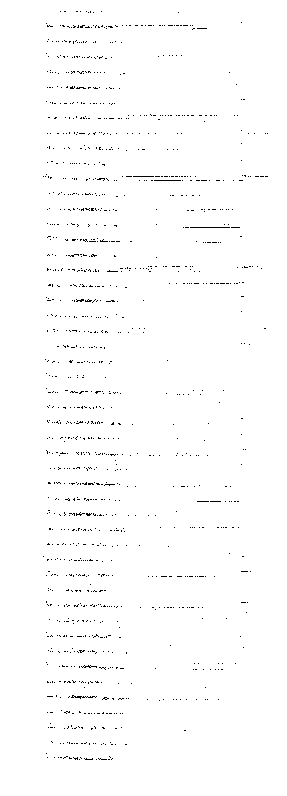

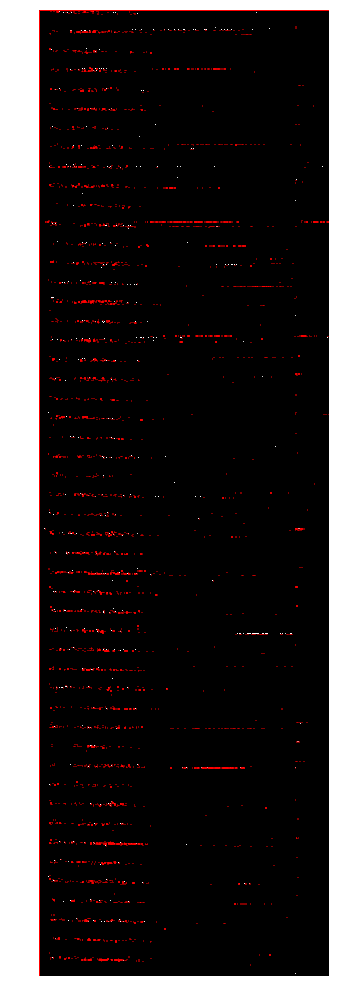

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
from skimage import feature
import cv2 as cv

#image = cv.imread('/home/rcardiff/fakeimage.png',0)
image = cv.imread('/home/rcardiff/ryan/ryan/filename.png',0)
image = image[30000:35000]

#thresh = threshold_otsu(image)
#print(thresh)
#binary = image > thresh


image_threshold = filters.threshold_local(image,block_size=11,offset = 10) 
binary = (image > image_threshold)

image_show(binary)
label_image = label(binary)
print(len(regionprops(label_image)))


fig, ax5 = plt.subplots(figsize=(14, 14))
ax5.imshow(image, cmap=plt.cm.gray)
ax5.axis('off')


for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=1)
    ax5.add_patch(rect)

plt.tight_layout()
plt.show()

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6304d486a0>)

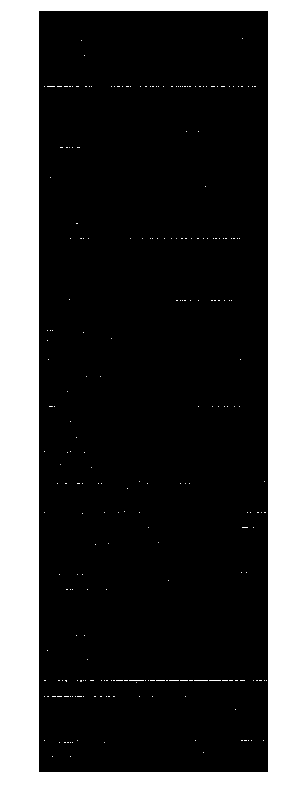

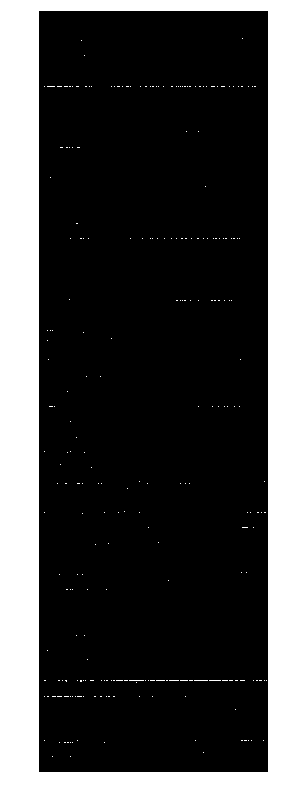

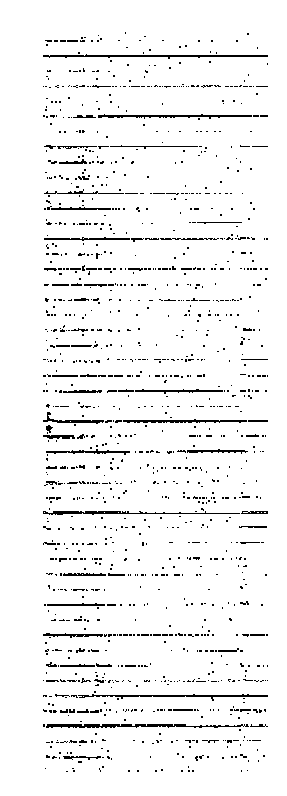

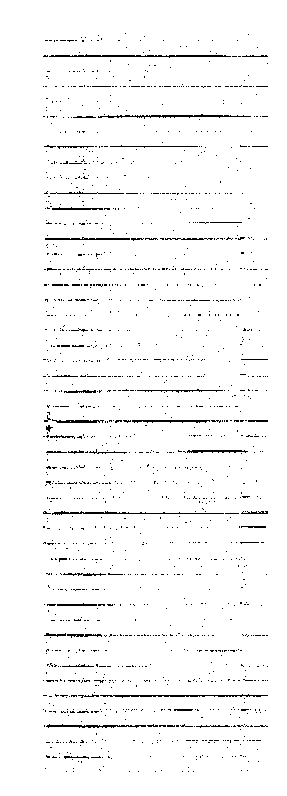

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread('/home/rcardiff/ryan/ryan/filename.png',0)
img = image[7000:12000]

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

image_show(img)
image_show(th1)
image_show(th2)
image_show(th3)